In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Read in the file and get basic information about the data, including numerical summaries.

In [2]:
df = pd.read_csv("bank-marketing.csv")
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 19)

In [4]:
df.dtypes

age           int64
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
df.tail()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,120000,married,secondary,yes,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [8]:
df.info

<bound method DataFrame.info of        age           job  salary   marital  education targeted default  \
0       58    management  100000   married   tertiary      yes      no   
1       44    technician   60000    single  secondary      yes      no   
2       33  entrepreneur  120000   married  secondary      yes      no   
3       47   blue-collar   20000   married    unknown       no      no   
4       33       unknown       0    single    unknown       no      no   
...    ...           ...     ...       ...        ...      ...     ...   
45206   51    technician   60000   married   tertiary      yes      no   
45207   71       retired   55000  divorced    primary      yes      no   
45208   72       retired   55000   married  secondary      yes      no   
45209   57   blue-collar   20000   married  secondary      yes      no   
45210   37  entrepreneur  120000   married  secondary      yes      no   

       balance housing loan    contact  day month  duration  campaign  pdays  \

In [9]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

age            77
job            12
salary         11
marital         3
education       4
targeted        2
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
response        2
dtype: int64

## Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [12]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [13]:
df.pdays.mean()

40.19782796222158

In [14]:
df.pdays.median()

-1.0

In [15]:
df.pdays.max()

871

## Describe the pdays column again, this time limiting yourself to the relevant values of pdays. 
## How different are the mean and the median values?

In [16]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: pdays, Length: 559, dtype: int64

In [17]:
# WE CAN CONSIDER REMOVING THE NEGATIVE VALUES AS IT IS RESEMBLING THE MISSING RECORDS. 
# AS MANY VALUES ARE MISSING WE CANT GO FOR IT NOW

In [18]:
df.pdays[df.pdays>0].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [19]:
# removing negative values
df.drop(df[df.pdays < 0].index, inplace=True)

In [20]:
df.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [21]:
q1,q2,q3 = np.quantile(df["pdays"],0.25),np.quantile(df["pdays"],0.50),np.quantile(df["pdays"],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR),q1-(1.5*IQR)
print(q1,q2,q3)
print(IQR)
print(uw,lw)

133.0 194.0 327.0
194.0
618.0 -158.0


In [22]:
df["pdays"] = np.where(df["pdays"] > uw, uw, df["pdays"])
df["pdays"] = np.where(df["pdays"] < lw, lw, df["pdays"])

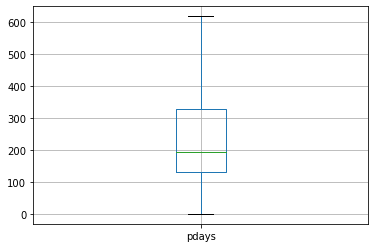

In [23]:
df.boxplot("pdays")
plt.show()

after removing the outliars the pdays value is -1
so after limiting the mean has been changed but the median is same.

## Plot a horizontal bar graph with the median values of balance for each education level value. 
## Which group has the highest median?

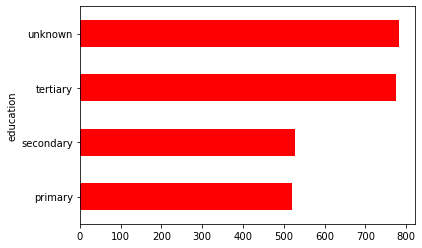

In [24]:
df.groupby(["education"])['balance'].median().plot.barh(color='r')
plt.show()

In [25]:
df.groupby('education')['balance'].median()

education
primary      520
secondary    527
tertiary     775
unknown      782
Name: balance, dtype: int64

In [1]:
print("thus the heighest median value is for the unknown whose education details are not known")

thus the heighest median value is for the unknown whose education details are not known


## Make a box plot for pdays. Do you see any outliers?

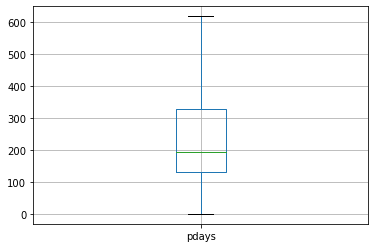

In [27]:
df.boxplot('pdays')
plt.show()

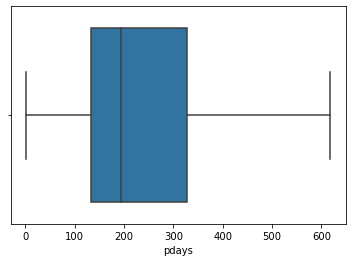

In [28]:
sns.boxplot(x=df.pdays)
plt.show()

### The final goal is to make a predictive model to predict if the customer will respond positively to the 
### campaign or not. The target variable is “response”.
### First, perform bi-variate analysis to identify the features that are directly associated with the target 
### variable. You can refer to the notebook we used for the EDA discussion.


bi-variate analysis

-Convert the response variable to a convenient form

In [29]:
df['response'].unique()

array(['no', 'yes'], dtype=object)

In [30]:
count= df.groupby("response").size()
percent= count/len(df)*100
print(percent)

response
no     76.928667
yes    23.071333
dtype: float64


In [31]:
# By using label encoding convert the categorical into numerical. 

#import label encoder.
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'response'.
df['response'] = label_encoder.fit_transform(df['response'])
df['response'].unique()

array([0, 1])

In [32]:
count= df.groupby("response").size()
percent= count/len(df)*100
print(percent)

response
0    76.928667
1    23.071333
dtype: float64


In [33]:
##this dataset is imbalncecd dataset having 0~ 77% and 1~23%

In [34]:
df.drop(df[df.pdays > 610].index, inplace=True)

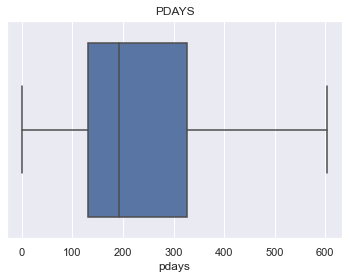

<Figure size 1440x720 with 0 Axes>

In [35]:
# plotting box plot

sns.set()
sns.boxplot(x=df.pdays)
plt.title("PDAYS")
plt.figure(figsize=(20,10))
plt.show()

In [36]:
print("removed outliers and ready to split and train")

removed outliers and ready to split and train


In [37]:
df.pdays.describe()

count    8206.000000
mean      221.359249
std       108.070094
min         1.000000
25%       131.000000
50%       193.000000
75%       326.000000
max       603.000000
Name: pdays, dtype: float64

In [38]:
df.mean()

age            40.954302
salary      57546.795028
balance      1560.101389
day            14.285279
duration      260.380210
campaign        2.060565
pdays         221.359249
previous        3.166829
response        0.229954
dtype: float64

In [39]:
df.median()

age            38.0
salary      60000.0
balance       602.0
day            14.0
duration      193.0
campaign        2.0
pdays         193.0
previous        2.0
response        0.0
dtype: float64

In [40]:
df.mode()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,33,management,100000,married,secondary,yes,no,0,yes,no,cellular,18,may,158,1,182.0,1,failure,0


now we performing EDA

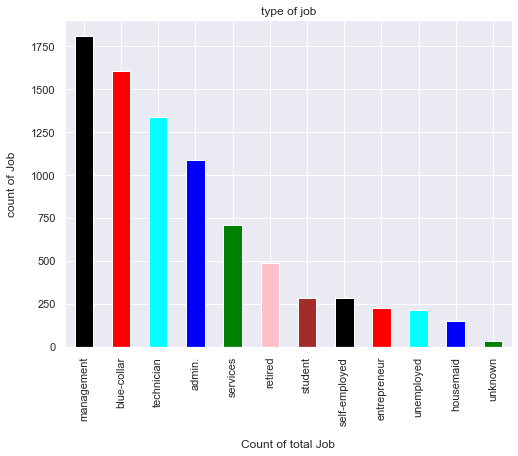

In [41]:
df['job'].value_counts().plot(kind='bar', figsize=(8, 6),color=['black', 'red','cyan','blue','green','pink','brown'])
plt.xlabel("Count of total Job", labelpad=14)
plt.ylabel("count of Job", labelpad=14)
plt.title("type of job")
plt.show()

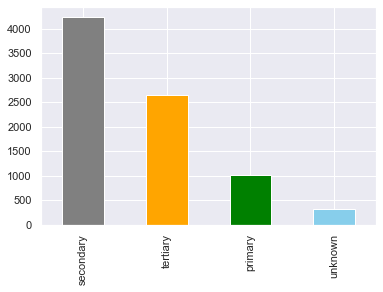

In [42]:
df.education.value_counts().plot(kind="bar",color=['gray', 'orange','green','skyblue'])
plt.show()

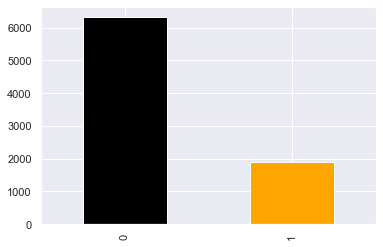

In [43]:
df.response.value_counts().plot(kind="bar", color=['black', 'orange'])
plt.show()

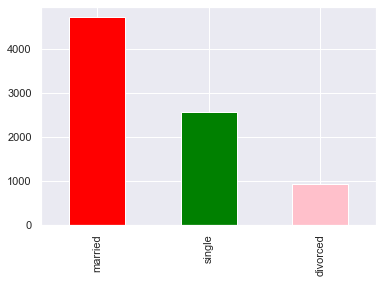

In [44]:
df.marital.value_counts().plot(kind='bar',color=['red','green','pink'])
plt.show()

In [2]:
#sns.pairplot(data=df,hue="response")
#plt.show()

In [46]:
# identyfying the multy colinearty

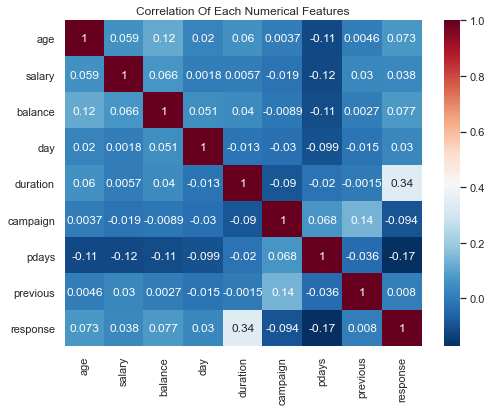

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r')
plt.title("Correlation Of Each Numerical Features")
plt.show()

In [48]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151.0,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166.0,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91.0,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86.0,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143.0,3,failure,1


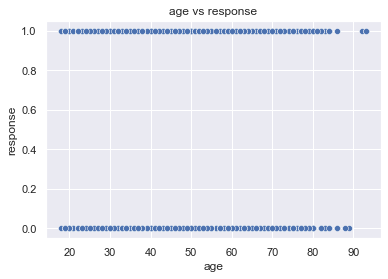

In [49]:
sns.scatterplot(x='age', y='response', data=df)
plt.title("age vs response")
plt.show()

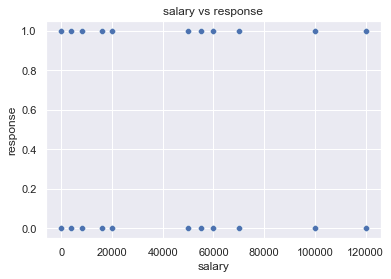

In [50]:
sns.scatterplot(x='salary', y='response', data=df)
plt.title("salary vs response")
plt.show()

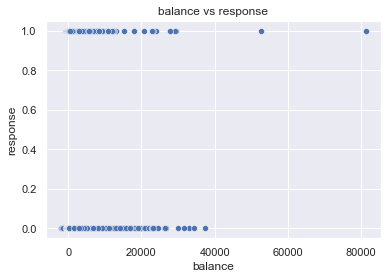

In [51]:
sns.scatterplot(x='balance', y='response', data=df)
plt.title("balance vs response")
plt.show()

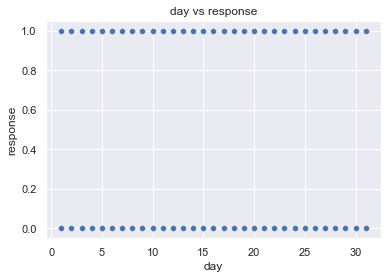

In [52]:
sns.scatterplot(x='day', y='response', data=df)
plt.title("day vs response")
plt.show()

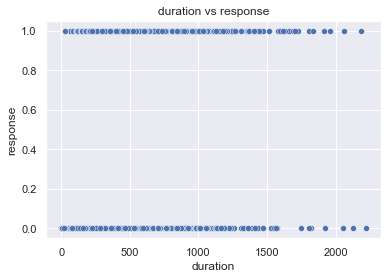

In [53]:
sns.scatterplot(x='duration', y='response', data=df)
plt.title("duration vs response")
plt.show()

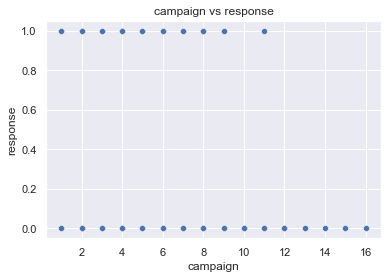

In [54]:
sns.scatterplot(x='campaign', y='response', data=df)
plt.title("campaign vs response")
plt.show()

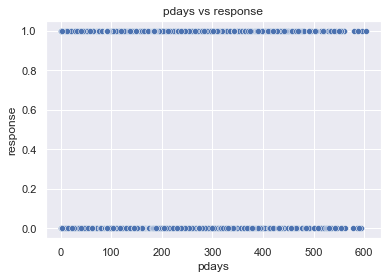

In [55]:
sns.scatterplot(x='pdays', y='response', data=df)
plt.title("pdays vs response")
plt.show()

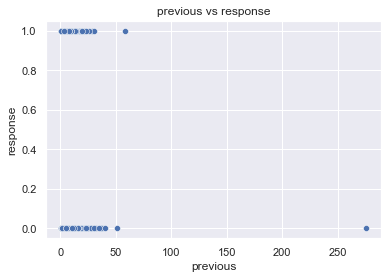

In [56]:
sns.scatterplot(x='previous', y='response', data=df)
plt.title("previous vs response")
plt.show()

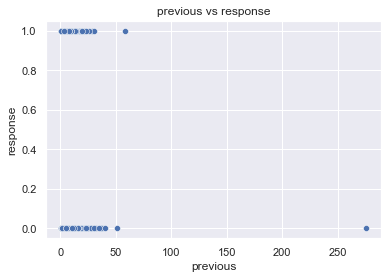

In [57]:
sns.scatterplot(x="previous", y="response", data = df)
plt.title("previous vs response")
plt.show()

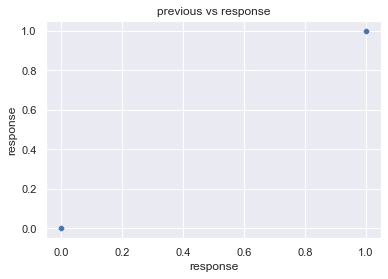

In [58]:
sns.scatterplot(x="response", y="response", data = df)
plt.title("previous vs response")
plt.show()

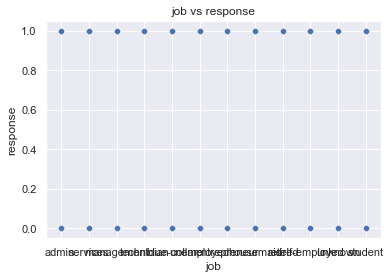

In [59]:
sns.scatterplot(x="job", y="response", data = df)
plt.title("job vs response")
plt.show()

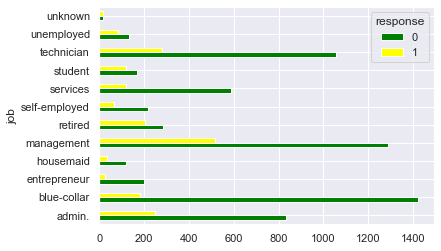

In [60]:
df1 = pd.crosstab(df['job'], df['response'])
df1.plot(kind='barh',color=['green','yellow'])
plt.show()

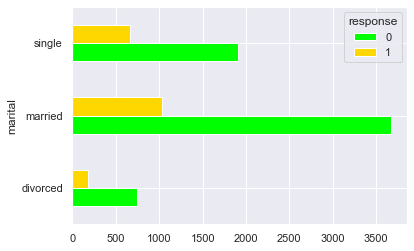

In [61]:
df1 = pd.crosstab(df['marital'], df['response'])
df1.plot(kind='barh',color=['lime','gold'])
plt.show()

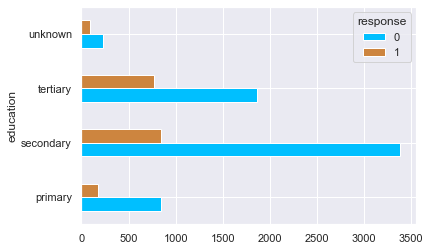

In [62]:
df1 = pd.crosstab(df['education'], df['response'])
df1.plot(kind='barh',color=['deepskyblue','peru'])
plt.show()

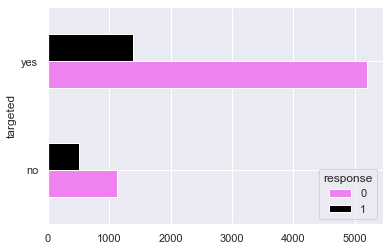

In [63]:
df1 = pd.crosstab(df['targeted'], df['response'])
df1.plot(kind='barh',color=['violet','black'])
plt.show()

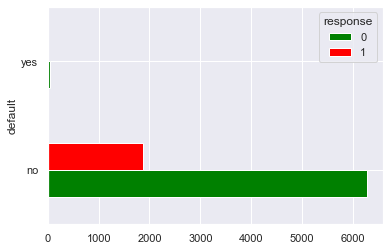

In [64]:
df1 = pd.crosstab(df['default'], df['response'])
df1.plot(kind='barh',color=['green','red'])
plt.show()

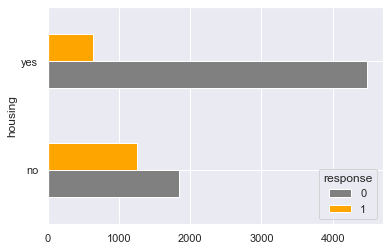

In [65]:
df1 = pd.crosstab(df['housing'], df['response'])
df1.plot(kind='barh',color=['gray','orange'])
plt.show()

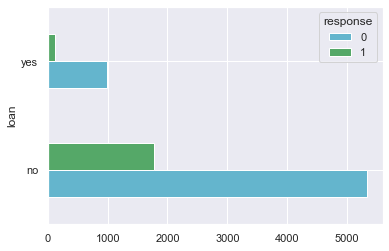

In [66]:
df1 = pd.crosstab(df['loan'], df['response'])
df1.plot(kind='barh',color=['c','g'])
plt.show()

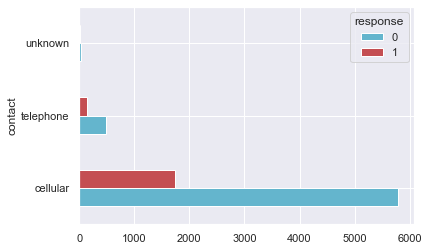

In [67]:
df1 = pd.crosstab(df['contact'], df['response'])
df1.plot(kind='barh',color=['c','r'])
plt.show()

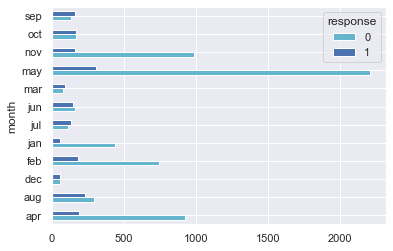

In [68]:
df1 = pd.crosstab(df['month'], df['response'])
df1.plot(kind='barh',color=['c','b'])
plt.show()

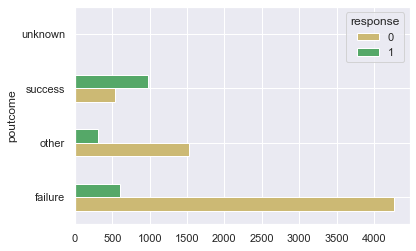

In [69]:
df1 = pd.crosstab(df['poutcome'], df['response'])
df1.plot(kind='barh',color=['y','g'])
plt.show()

Ans : yes the features about the previous campaign data is useful as responce(target variable) says the engagement and succes of the compaign.

ANS : I DONT THINK SO AS PREVIOUS DATA WERE MISSING AND NO CONSISTANT RELATION       WAS OBSERBED
      FROM THE DATASET AND THE MOSTLY RESPONSES WERE UNKNOWN THUS I DONT TAKE         IT INTO MY CONSIDERATION


Before the predictive modeling part, make sure to perform –
- The necessary transformations for the categorical variables and the numeric     variables


In [70]:
catagorical = df.select_dtypes(include = "object").columns.tolist()
catagorical

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [71]:
numeric = df.select_dtypes(exclude = "object").columns.tolist()
numeric

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'response']

In [72]:
from sklearn.preprocessing import LabelEncoder
labelencoder = df[catagorical].apply(LabelEncoder().fit_transform)
labelencoder

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0
...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1
45201,4,1,2,1,0,0,0,0,9,2
45204,5,1,1,1,0,0,0,0,9,0
45208,5,1,1,1,0,0,0,0,9,2


In [73]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [74]:
df1 =labelencoder.join(df[numeric])
df1

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151.0,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166.0,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91.0,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86.0,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1,34,20000,1475,16,1166,3,530.0,12,0
45201,4,1,2,1,0,0,0,0,9,2,53,100000,583,17,226,1,184.0,4,1
45204,5,1,1,1,0,0,0,0,9,0,73,55000,2850,17,300,1,40.0,8,1
45208,5,1,1,1,0,0,0,0,9,2,72,55000,5715,17,1127,5,184.0,3,1


In [75]:
df1

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151.0,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166.0,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91.0,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86.0,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1,34,20000,1475,16,1166,3,530.0,12,0
45201,4,1,2,1,0,0,0,0,9,2,53,100000,583,17,226,1,184.0,4,1
45204,5,1,1,1,0,0,0,0,9,0,73,55000,2850,17,300,1,40.0,8,1
45208,5,1,1,1,0,0,0,0,9,2,72,55000,5715,17,1127,5,184.0,3,1


In [76]:
y = df1.response
y

24060    0
24062    1
24064    1
24072    0
24077    1
        ..
45199    0
45201    1
45204    1
45208    1
45210    0
Name: response, Length: 8206, dtype: int32

In [77]:
x = df1.drop("response", axis = 1)
x

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151.0,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166.0,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91.0,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86.0,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1,34,20000,1475,16,1166,3,530.0,12
45201,4,1,2,1,0,0,0,0,9,2,53,100000,583,17,226,1,184.0,4
45204,5,1,1,1,0,0,0,0,9,0,73,55000,2850,17,300,1,40.0,8
45208,5,1,1,1,0,0,0,0,9,2,72,55000,5715,17,1127,5,184.0,3


In [78]:
x.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151.0,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166.0,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91.0,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86.0,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143.0,3


In [79]:
y.head()

24060    0
24062    1
24064    1
24072    0
24077    1
Name: response, dtype: int32

- Train test split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [82]:
var=[x_train,x_test,y_test,y_train,y_test]

In [83]:
for i in var:
    print(i.head(2))

       job  marital  education  targeted  default  housing  loan  contact  \
29168    6        0          1         1        0        0     0        0   
24494    9        1          1         1        0        0     1        0   

       month  poutcome  age  salary  balance  day  duration  campaign  pdays  \
29168      3         1   55   60000     1530    2       166         1  216.0   
24494      9         0   47   60000       80   17        74         1  145.0   

       previous  
29168         1  
24494         1  
       job  marital  education  targeted  default  housing  loan  contact  \
44428    0        1          2         1        0        0     1        0   
40058    7        2          1         1        0        0     0        0   

       month  poutcome  age  salary  balance  day  duration  campaign  pdays  \
44428      1         2   34   50000       69    4       120         3    1.0   
40058      6         2   37   70000     1045    4       106         1   79.0   



## Predictive model 1: Logistic regression

In [84]:
#feature scaling
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler() 
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)
print (x_train)

[[ 0.5092315  -1.91618217 -0.38122267 ... -0.6833669  -0.04506013
  -0.45590527]
 [ 1.42921193 -0.31002462 -0.38122267 ... -0.6833669  -0.70336748
  -0.45590527]
 [-1.33072936 -0.31002462 -0.38122267 ... -0.6833669  -0.36030591
  -0.2458272 ]
 ...
 [-0.10408879  1.29613292  1.00205296 ...  0.60616029 -0.99079745
  -0.45590527]
 [ 1.73587207  1.29613292  2.3853286  ... -0.6833669  -1.16696421
  -0.45590527]
 [ 0.81589164  1.29613292 -0.38122267 ... -0.6833669  -0.42520945
  -0.45590527]]


In [85]:
# Build the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(x_train,y_train)

In [86]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [87]:
from sklearn.metrics import confusion_matrix, classification_report

In [88]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1197   83]
 [ 167  195]]


In [89]:
# What is the precision, recall, accuracy of your model?


In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1280
           1       0.70      0.54      0.61       362

    accuracy                           0.85      1642
   macro avg       0.79      0.74      0.76      1642
weighted avg       0.84      0.85      0.84      1642



In [91]:
from sklearn.metrics import accuracy_score
ac_score = accuracy_score(y_test, y_pred)
print("accuracy=",ac_score*100)

accuracy= 84.77466504263094


In [92]:
#roc score

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.7369151415745857

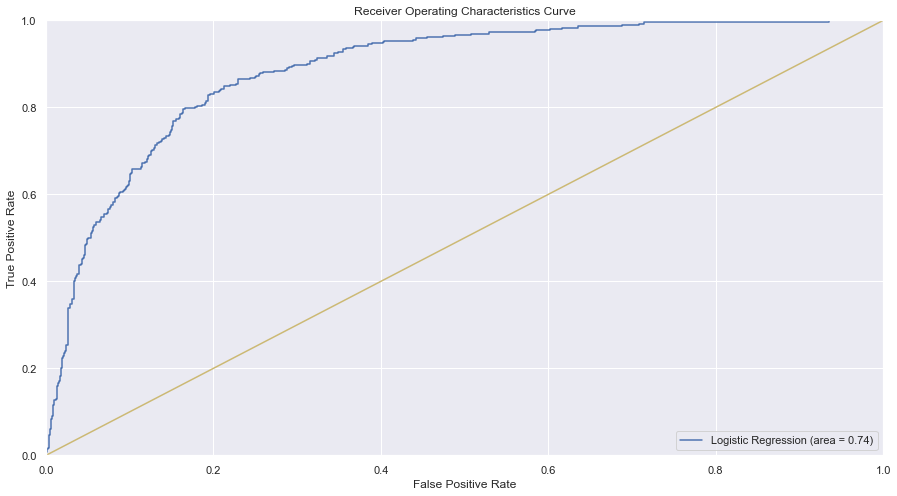

In [94]:
roc_score = roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure(figsize = (15, 8))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % roc_score)
plt.plot([0,1], [0,1], 'y')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()

USING RFE

In [105]:
import warnings

In [106]:
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,18)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    rfe = RFE(logreg,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 15
Score with 15 features: 0.831438


In [ ]:
# Applying K-folds validation

In [96]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= logreg, X=x_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('Logistic Regression (Lasso) Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression (Lasso) Accuracy: 0.827 (+/- 0.025)


In [107]:
cols = list(x.columns)
#Initializing RFE model
rfe = RFE(logreg, 15)             
#Transforming data using RFE
x_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(x_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print("Most important models=", selected_features_rfe)

Most important models= Index(['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'age', 'day', 'duration', 'campaign',
       'previous'],
      dtype='object')


# Predictive model 2: Random Forest

### Make a predictive model using random forest technique
### Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [108]:
#Fitting Decision Tree classifier to the training set  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 45)  
classifier.fit(x_train,y_train)  

#Predicting the test set result  
y_pred1= classifier.predict(x_test)  
y_pred1

array([1, 0, 0, ..., 1, 0, 1])

In [109]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred1)  
cm

array([[1438,  124],
       [ 206,  284]], dtype=int64)

In [113]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1562
           1       0.70      0.58      0.63       490

    accuracy                           0.84      2052
   macro avg       0.79      0.75      0.76      2052
weighted avg       0.83      0.84      0.83      2052



In [110]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X=x_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('Logistic Regression (Lasso) Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression (Lasso) Accuracy: 0.855 (+/- 0.025)


In [115]:
from sklearn.metrics import accuracy_score
ac_score = accuracy_score(y_test, y_pred1)
print("accuracy=",ac_score*100)

accuracy= 83.91812865497076


In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_score1= roc_auc_score(y_test, y_pred1)
roc_score1

0.7501032167028142

In [139]:
import pandas as pd
feature_imp = pd.Series(classifier.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

duration     0.210569
poutcome     0.158076
pdays        0.116934
balance      0.077483
age          0.070989
day          0.068065
month        0.065888
previous     0.040342
housing      0.038224
job          0.032593
salary       0.030613
campaign     0.028054
education    0.018708
marital      0.017896
targeted     0.008592
loan         0.007946
contact      0.007929
default      0.001098
dtype: float64

No handles with labels found to put in legend.


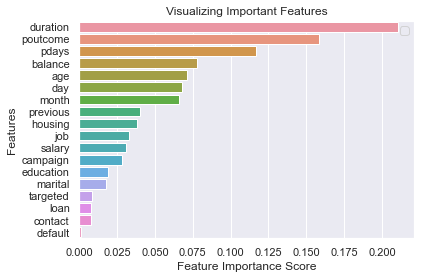

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Compare the performance of the Random Forest and the logistic model –

In [120]:
# for logistic regression

            precision    recall  f1-score   support

           0       0.88      0.94      0.91      1280
           1       0.70      0.54      0.61       362

    accuracy                           0.85      1642
   macro avg       0.79      0.74      0.76      1642
weighted avg       0.84      0.85      0.84      1642

In [127]:
print("for random forest")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

for random forest
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1562
           1       0.70      0.58      0.63       490

    accuracy                           0.84      2052
   macro avg       0.79      0.75      0.76      2052
weighted avg       0.83      0.84      0.83      2052



accuracy of random forest is 84% but logistic regression accuracy is littile bit of 1 %diff=85%

- Which metric did you choose and why?

- Which model has better performance on the test set?

- Compare the feature importance from the different models – do they agree? Are the top 
  features similar in both models